In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
import os
print(os.listdir("/content/drive/My Drive/btp/input"))

['training_set', 'test_set']


In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/btp/input/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/btp/input/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 313 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [ ]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 800,
                         callbacks = [checkpoint])
print(history.history.keys())




Epoch 1/5





200/200 [==============================] - 2620s 13s/step - loss: 0.5423 - acc: 0.7716 - val_loss: 0.7194 - val_acc: 0.6591

Epoch 00001: val_acc improved from -inf to 0.65913, saving model to best_model.hdf5
Epoch 2/5
200/200 [==============================] - 2472s 12s/step - loss: 0.4685 - acc: 0.7871 - val_loss: 0.6305 - val_acc: 0.6706

Epoch 00002: val_acc improved from 0.65913 to 0.67056, saving model to best_model.hdf5
Epoch 3/5
200/200 [==============================] - 2709s 14s/step - loss: 0.4168 - acc: 0.8162 - val_loss: 0.6333 - val_acc: 0.7272

Epoch 00003: val_acc improved from 0.67056 to 0.72724, saving model to best_model.hdf5
Epoch 4/5
200/200 [==============================] - 2730s 14s/step - loss: 0.3335 - acc: 0.8442 - val_loss: 0.8371 - val_acc: 0.7160

Epoch 00004: val_acc did not improve from 0.72724
Epoch 5/5
200/200 [==============================] - 2573s 13s/step - loss: 0.2536 - acc: 0.8863 - val_loss: 0.5781 - val_acc: 0.7500

Epoch 000

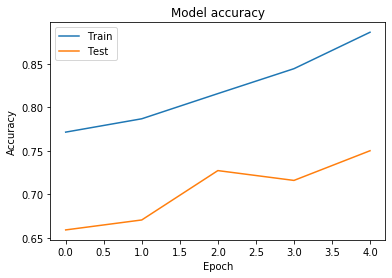

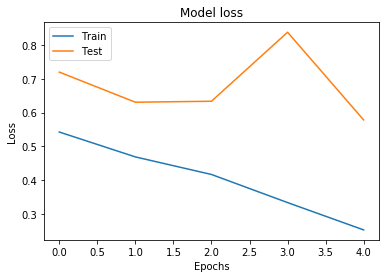

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/btp/dataset/btp dataset/healthy/15_h.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
#print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'glaucoma'
print(prediction)

[[0.]]
glaucoma
